# Heart Disease Prediction Model

This notebook demonstrates training a machine learning model to predict heart disease.

**Features:** age, sex, chest pain type, blood pressure, cholesterol, fasting blood sugar, ECG results, max heart rate, exercise angina, ST depression, slope, ca, thal  
**Target:** Heart disease presence (0 = no, 1 = yes)  
**Model:** Classification (SVM, Random Forest, Logistic Regression, etc.)

**Note:** This is a template notebook. You'll need to provide the heart disease dataset to run this completely.

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    roc_auc_score, roc_curve, precision_score, recall_score, f1_score
)
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set plot styles
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries imported!")

✓ Libraries imported!


## 2. Load Dataset

**Dataset Source:** Heart disease dataset (UCI ML Repository / Kaggle)  
**Columns:** age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target

In [3]:

print("Expected columns:")
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
print(columns)

df = pd.read_csv('../Frontend/data/Heart_Disease_Prediction.csv')
display(df.head())
print(f"Dataset shape: {df.shape}")

Expected columns:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


Dataset shape: (270, 14)


## 3. Exploratory Data Analysis

In [4]:
# Uncomment when you have data loaded:
print("Dataset Info:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe())
print("\nMissing values:")
print(df.isnull().sum())
print("\nTarget distribution:")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000



Missing values:
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Target distribution:


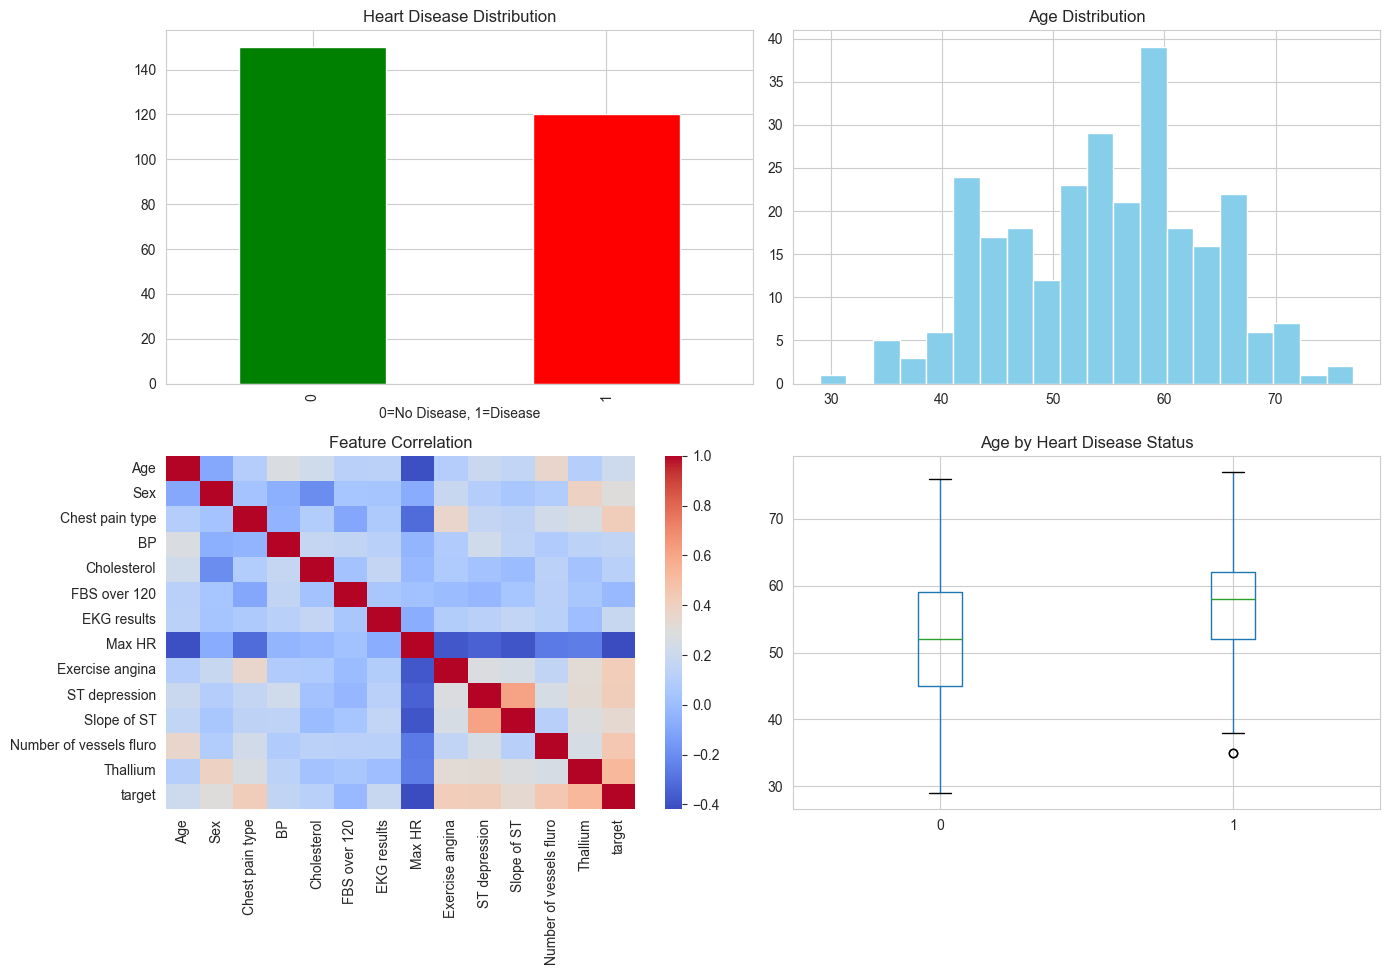

In [5]:
# Visualizations
# Uncomment when data is loaded:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Ensure a standardized 'target' column exists (0 = No disease, 1 = Disease)
if 'target' not in df.columns:
	if 'Heart Disease' in df.columns:
		# Map common string labels to 0/1
		df['target'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
	else:
		# Try other common variants (case-insensitive)
		cols_lower = {c.lower(): c for c in df.columns}
		if 'heart disease' in cols_lower:
			colname = cols_lower['heart disease']
			df['target'] = df[colname].map(lambda v: 1 if str(v).lower().startswith('pres') else 0 if str(v).lower().startswith('abs') else np.nan)
		elif 'target' in cols_lower and cols_lower['target'] != 'target':
			df['target'] = df[cols_lower['target']]
		else:
			# As a last resort try to convert any object column with two unique values to binary
			obj_cols = df.select_dtypes(include='object').columns.tolist()
			created = False
			for c in obj_cols:
				uniques = df[c].dropna().unique()
				if len(uniques) == 2:
					mapping = {uniques[0]: 1, uniques[1]: 0}
					df['target'] = df[c].map(mapping)
					created = True
					break
			if not created:
				raise KeyError("Could not find or create a 'target' column. Expected 'target' or 'Heart Disease'.")

# Target distribution
df['target'].value_counts().sort_index().plot(kind='bar', ax=axes[0,0], color=['green', 'red'])
axes[0,0].set_title('Heart Disease Distribution')
axes[0,0].set_xlabel('0=No Disease, 1=Disease')

# Age distribution (handle 'Age' or 'age')
age_col = 'Age' if 'Age' in df.columns else 'age' if 'age' in df.columns else None
if age_col is None:
	raise KeyError("Could not find an 'Age' column (expected 'Age' or 'age').")
df[age_col].hist(bins=20, ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Age Distribution')

# Correlation heatmap (use numeric columns only)
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', ax=axes[1,0])
axes[1,0].set_title('Feature Correlation')

# Box plot for age by target
df.boxplot(column=age_col, by='target', ax=axes[1,1])
axes[1,1].set_title('Age by Heart Disease Status')
axes[1,1].set_xlabel('')
plt.suptitle('')  # remove automatic suptitle from boxplot

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [6]:

drop_cols = ['target']
if 'Heart Disease' in df.columns:
	drop_cols.append('Heart Disease')

X = df.drop(drop_cols, axis=1)
y = df['target']

# Convert any remaining object/categorical feature columns to numeric codes
for col in X.select_dtypes(include='object').columns:
	X[col] = X[col].astype('category').cat.codes

# Handle missing values if any (numeric columns only)
X = X.fillna(X.median())

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (270, 13)
Target shape: (270,)


In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (216, 13)
Test set: (54, 13)


In [8]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled!")

✓ Features scaled!


## 5. Model Training

In [9]:
# Import log loss metric
from sklearn.metrics import log_loss

# Train multiple models with their optimizers
# Each model uses different optimization algorithms internally
models = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        solver='lbfgs',  # Optimizer: Limited-memory BFGS (quasi-Newton method)
        random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        random_state=42
        # Uses greedy optimization (information gain/Gini impurity)
    ),
    'SVM': SVC(
        probability=True,
        kernel='rbf',
        random_state=42
        # Uses Sequential Minimal Optimization (SMO) for quadratic programming
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,  # Optimizer step size
        random_state=42
        # Uses Gradient Descent optimization
    )
}

# Print optimizer information
print("🔧 Optimizers Used:")
print("   - Logistic Regression: L-BFGS (Limited-memory Broyden–Fletcher–Goldfarb–Shanno)")
print("   - Random Forest: Greedy Search (Information Gain/Gini Impurity)")
print("   - SVM: SMO (Sequential Minimal Optimization)")
print("   - Gradient Boosting: Gradient Descent\n")

results = {}
loss_results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    logloss = log_loss(y_test, y_proba)
    
    results[name] = acc
    loss_results[name] = logloss
    
    print(f"{name:25s} Accuracy: {acc:.4f} | Log Loss: {logloss:.4f}")

# Select best model (lowest loss)
best_model_name = min(loss_results, key=loss_results.get)
best_model = models[best_model_name]
print(f"\n🏆 Best Model (Lowest Loss): {best_model_name} (Loss: {loss_results[best_model_name]:.4f})")

Logistic Regression       Accuracy: 0.8519 | Log Loss: 0.4463
Random Forest             Accuracy: 0.8148 | Log Loss: 0.4495
SVM                       Accuracy: 0.8148 | Log Loss: 0.4461
Random Forest             Accuracy: 0.8148 | Log Loss: 0.4495
SVM                       Accuracy: 0.8148 | Log Loss: 0.4461
Gradient Boosting         Accuracy: 0.8148 | Log Loss: 0.4943

🏆 Best Model (Lowest Loss): SVM (Loss: 0.4461)
Gradient Boosting         Accuracy: 0.8148 | Log Loss: 0.4943

🏆 Best Model (Lowest Loss): SVM (Loss: 0.4461)


## Optimizer Details

**Optimization Algorithms Used:**

1. **Logistic Regression - L-BFGS**
   - Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm
   - Quasi-Newton method for unconstrained optimization
   - Memory-efficient approximation of the Hessian matrix
   
2. **Random Forest - Greedy Search**
   - Uses Gini Impurity or Information Gain
   - Greedily selects best split at each node
   - No global optimization, builds trees independently
   
3. **SVM - SMO (Sequential Minimal Optimization)**
   - Breaks large quadratic programming (QP) problem into smaller pieces
   - Analytically solves smallest possible optimization problems
   - Efficient for large datasets
   
4. **Gradient Boosting - Gradient Descent**
   - Fits new models to residual errors of previous models
   - Uses gradient descent on loss function
   - Learning rate controls step size

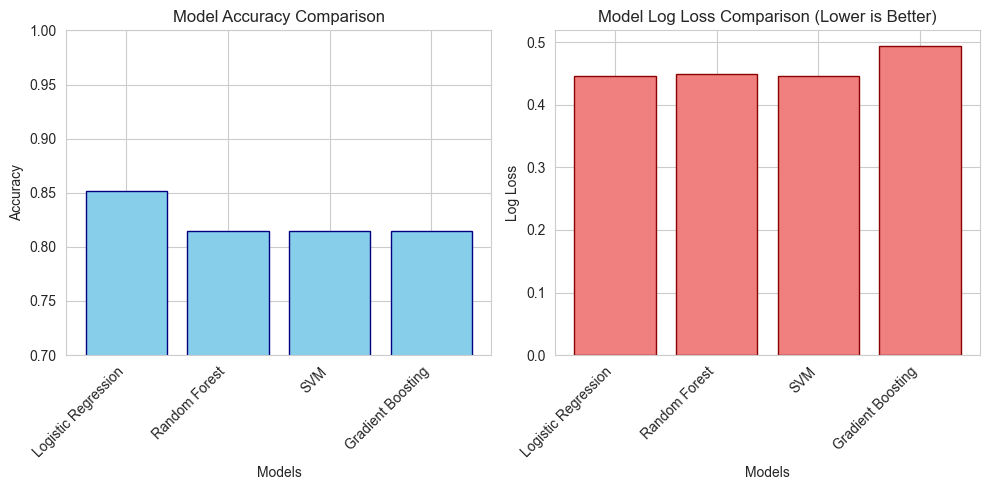

In [10]:
# Visualize Model Performance - Loss Comparison
plt.figure(figsize=(10, 5))

# Plot 1: Accuracy Comparison
plt.subplot(1, 2, 1)
plt.bar(results.keys(), results.values(), color='skyblue', edgecolor='navy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim([0.7, 1.0])

# Plot 2: Log Loss Comparison (lower is better)
plt.subplot(1, 2, 2)
plt.bar(loss_results.keys(), loss_results.values(), color='lightcoral', edgecolor='darkred')
plt.xlabel('Models')
plt.ylabel('Log Loss')
plt.title('Model Log Loss Comparison (Lower is Better)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 6. Model Evaluation

In [11]:
# Detailed evaluation of best model
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:")
print("="*60)
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.86      0.80      0.83        30
     Disease       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54


ROC-AUC Score: 0.8861


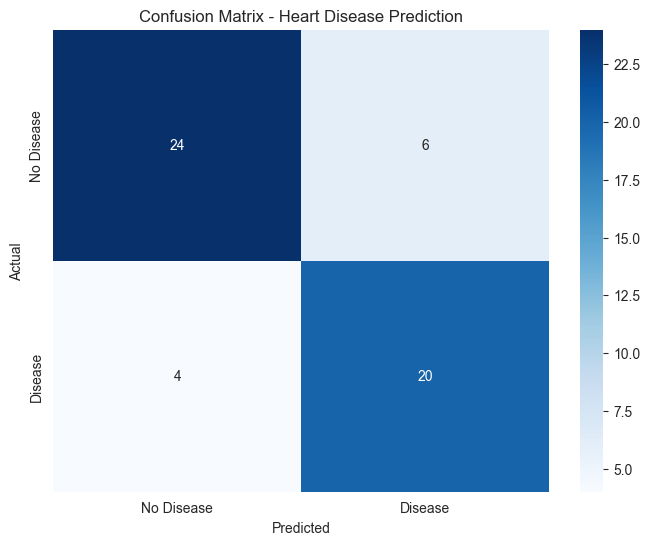

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Heart Disease Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

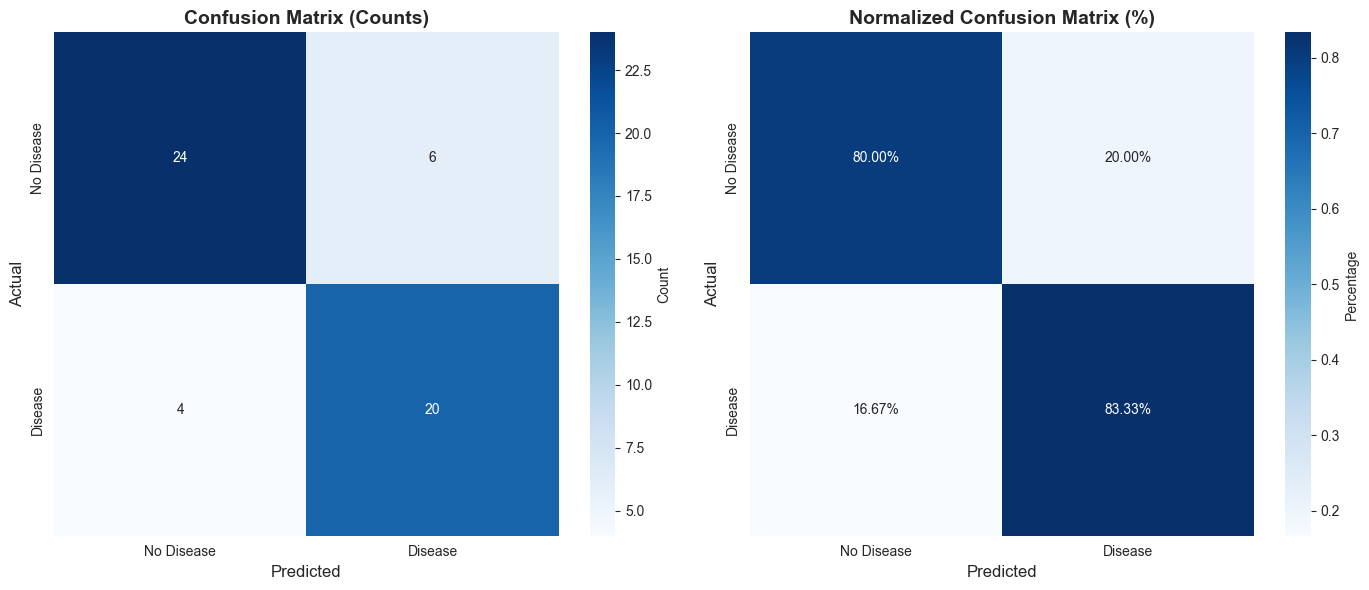


Detailed Breakdown:
  True Negatives:  24 - Correctly identified healthy patients
  False Positives: 6 - Healthy patients incorrectly flagged
  False Negatives: 4 - Heart disease cases missed ⚠️
  True Positives:  20 - Correctly identified heart disease

Sensitivity/Recall: 83.33% - Detection rate
Specificity:        80.00% - True negative rate


In [13]:
# Enhanced Confusion Matrix Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Standard confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'],
            ax=ax1, cbar_kws={'label': 'Count'})
ax1.set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Actual', fontsize=12)
ax1.set_xlabel('Predicted', fontsize=12)

# Normalized confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'],
            ax=ax2, cbar_kws={'label': 'Percentage'})
ax2.set_title('Normalized Confusion Matrix (%)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Actual', fontsize=12)
ax2.set_xlabel('Predicted', fontsize=12)

plt.tight_layout()
plt.show()

# Print detailed metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()
print(f"\nDetailed Breakdown:")
print(f"  True Negatives:  {tn} - Correctly identified healthy patients")
print(f"  False Positives: {fp} - Healthy patients incorrectly flagged")
print(f"  False Negatives: {fn} - Heart disease cases missed ⚠️")
print(f"  True Positives:  {tp} - Correctly identified heart disease")
print(f"\nSensitivity/Recall: {tp/(tp+fn):.2%} - Detection rate")
print(f"Specificity:        {tn/(tn+fp):.2%} - True negative rate")

### Enhanced Confusion Matrix with Metrics

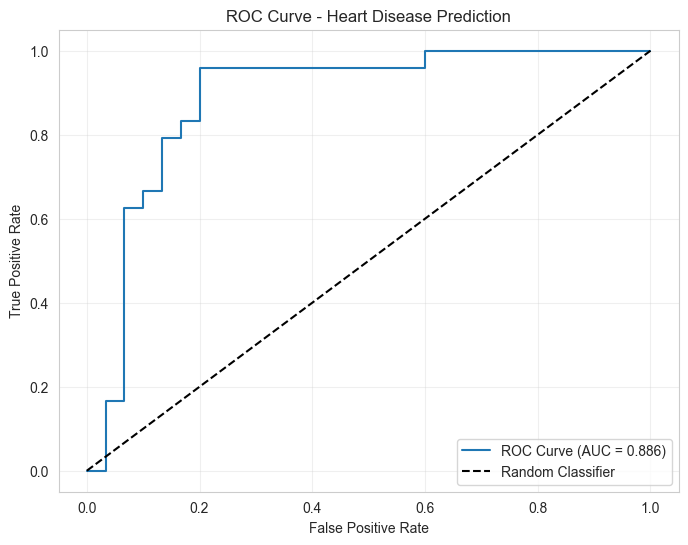

In [14]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Heart Disease Prediction')
plt.legend()
plt.grid(alpha=0.3)
plt.show()